In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## МНК для линейной регрессии
$\mathbf{w}=(A^TA)^{-1}(A^T\mathbf{y})$ 

Загрузите файл food_trucks.txt. В нём два столбца значений — количество жителей в городе и доход грузовика с уличной едой в этом городе.

In [2]:
df = pd.read_csv("food_trucks.txt", header=None)
df.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


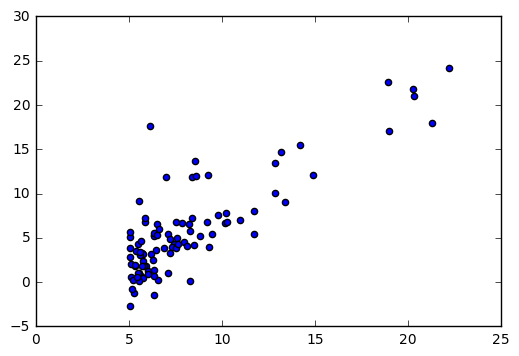

In [3]:
plt.scatter(df[0], df[1])

In [4]:
y = np.array(df[1])
x1 = np.array(df[0])
x0 = np.ones(x1.shape)
print(len(y))
print(len(x1))
print(len(x0))

97
97
97


In [5]:
A = np.matrix([x0, x1]).transpose()
y = np.expand_dims(y, axis=1)
print(A.shape)
print(y.shape)

(97, 2)
(97, 1)


In [6]:
w = np.linalg.inv(A.transpose()*A)*(A.transpose()*y)

In [7]:
yhat = w[0]*x0 + w[1]*x1

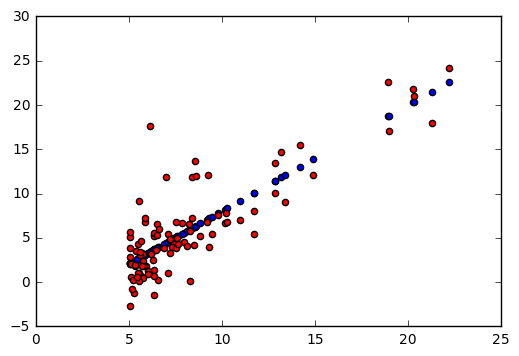

In [8]:
plt.scatter(x1, np.array(yhat))
plt.scatter(x1, y, c='red')

In [9]:
w

matrix([[-3.89578088],
        [ 1.19303364]])

 ${\displaystyle R^{2}}$ (Коэффициент детерминации) — это доля дисперсии объясняемая моделью 

In [10]:
from sklearn.metrics import r2_score

In [11]:
r2_score(np.squeeze(np.array(y)), np.squeeze(np.array(yhat)))

0.70203155378413973

## Предположения МНК 

1. Истинная модель $y$ действительно линейна
2. Случайность выборки
3. Полнота ранга $A$
4. Случайность ошибок
5. Гомоскедастичность ошибок (однородность дисперсии)
6. Нормальность ошибок


МНК-оценки  являются несмещёнными, состоятельными и наиболее эффективными оценками в классе всех линейных несмещённых оценок

---

## Методы оптимизации

Как было показано на лекции, большинство методов машинного обучения сводятся к поиску параметров, которые минимизируют ошибку на тренировочной выборке:
$$
\min_{w} L(w; D)
$$
Здесь:
* $D$ — размеченная обучающая выборка, $\{x_i, y_i\}_{i=1}^N$
* $L$ — функция потерь
* $w$ — настраиваемые веса алгоритма

В более общем виде задачу можно записать так:
$$
\min_{x} f(x)
$$
Здесь:
* $x$ — вектор значений
* $f$ — функция, принимающая вектор в качестве аргумента и выдающая числовое значение.

На семинаре рассмотрим подробнее методы минимизации функции, которые рассматривались на лекции.

## Градиентный спуск

Для оптимизации возьмем простую функцию $f(x) = x^3 - 2x^2 + 2$

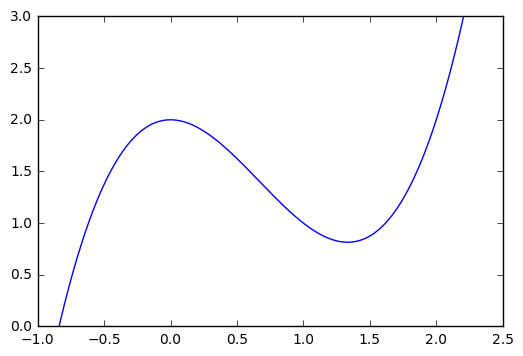

In [12]:
f = lambda x: x ** 3 - 2*x ** 2 + 2
df = lambda x: 3 * x ** 2 - 4 * x # производная
x = np.linspace(-1, 2.5, 1000)
plt.plot(x, f(x))
plt.xlim([-1, 2.5])
plt.ylim([0, 3])
plt.show()

И определим функцию, которая будет оптимизировать функцию $f(x)$ градиентным спуском с заданным постоянным шагом (он же learning rate, темп обучения).

In [15]:
def optimize_and_plot_steps(learning_rate, x_new=2, compute_learning_rate=None):
    x_old = 0
    # x_new — точка старта
    eps = 0.0001
    x_list, y_list = [x_new], [f(x_new)] # инициализируем список координат и значений функций при итерации
    
    # спускаемся, пока разница между координатами не достигла требуемой точности
    i = 0
    while abs(x_new - x_old) > eps: 
        x_old = x_new
        # считаем направление спуска
        direction = -df(x_old)
        # обновляем значение темпа обучения, если нам задана функция для этого
        if compute_learning_rate is not None:
            learning_rate = compute_learning_rate(i, learning_rate)
        # делаем шаг
        x_new = x_old + learning_rate * direction
        # запоминаем очередной шаг минимизации
        x_list.append(x_new)
        y_list.append(f(x_new))
        i += 1
        
    print("Found local min:", x_new)
    print("Steps number:", len(x_list))
    
    plt.figure(figsize=[10,3])
    
    plt.subplot(1,2,1)
    plt.scatter(x_list, y_list, c="r")
    plt.plot(x_list, y_list, c="r")
    plt.plot(x, f(x), c="b")
    plt.xlim([-1,2.5])
    plt.ylim([0,3])
    plt.title("Descent trajectory")

    plt.subplot(1,2,2)
    plt.scatter(x_list,y_list,c="r")
    plt.plot(x_list,y_list,c="r")
    plt.plot(x,f(x), c="b")
    plt.xlim([1.2,2.1])
    plt.ylim([0,3])
    plt.title("Descent trajectory (zoomed in)")
    plt.show()

Попробуем оптимизацию с шагом 0.1

Found local min: 1.333243030069994
Steps number: 18


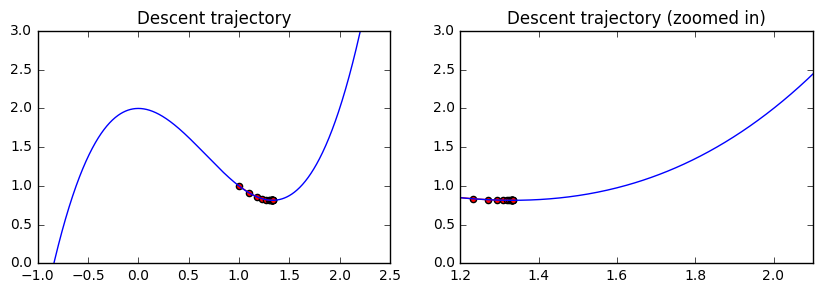

In [16]:
optimize_and_plot_steps(0.1, x_new=1)

Возьмем шаг побольше.

Found local min: 1.3333020223878838
Steps number: 15


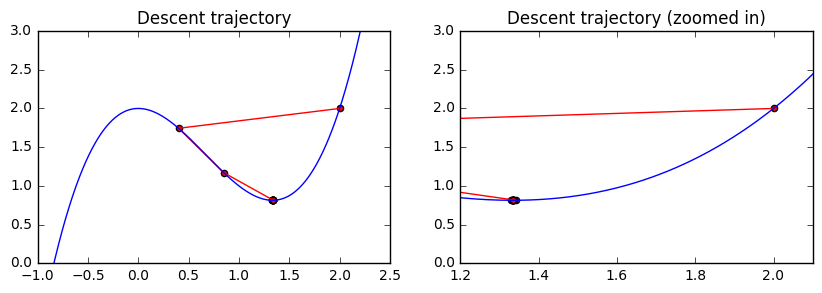

In [17]:
optimize_and_plot_steps(0.4)

Что, если взять 0.5?

Found local min: 0.0
Steps number: 3


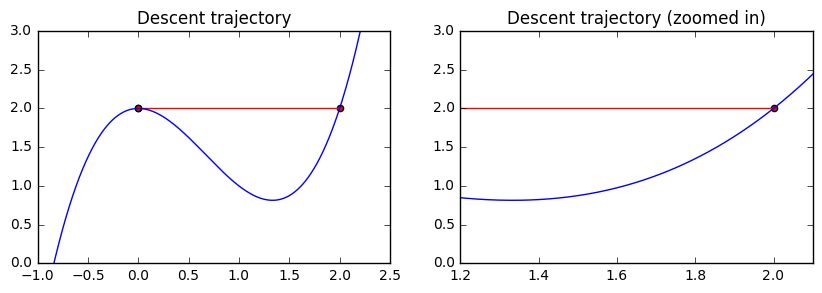

In [18]:
optimize_and_plot_steps(0.5)

Застопорились в нуле, т.к. нашли точный локальный максимум. В нем производная равна нулю и мы никуда не можем сдвинуться. А если взять 0.49?

Found local min: 1.3333812706364907
Steps number: 188


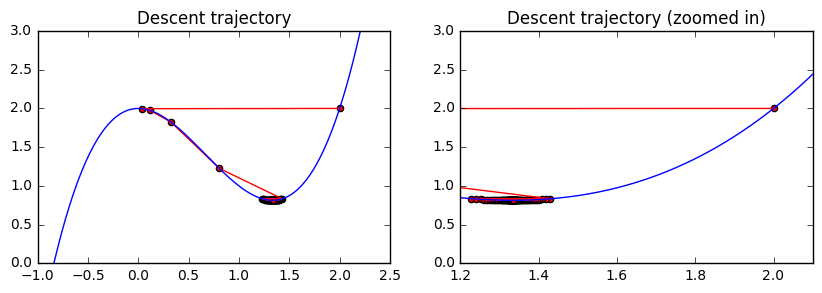

In [19]:
optimize_and_plot_steps(0.49)

Что, если взять 0.51?

In [20]:
optimize_and_plot_steps(0.51)

OverflowError: (34, 'Numerical result out of range')

Мы улетели далеко влево. Это можно понять, распечатав значения x_new.

Теперь возьмём маленький шаг. Например, 0.05.

Found local min: 1.3337297312792562
Steps number: 32


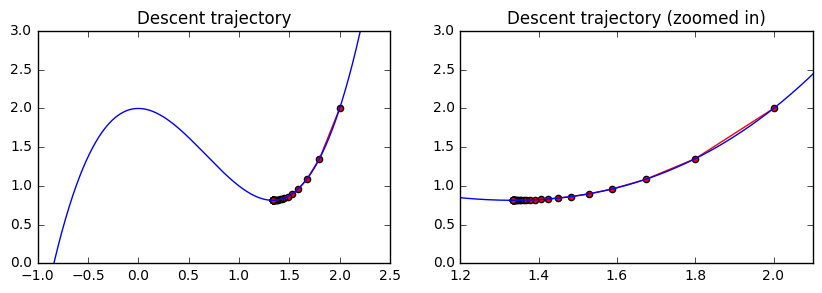

In [21]:
optimize_and_plot_steps(0.05)

0.01?

Found local min: 1.3356881625009205
Steps number: 129


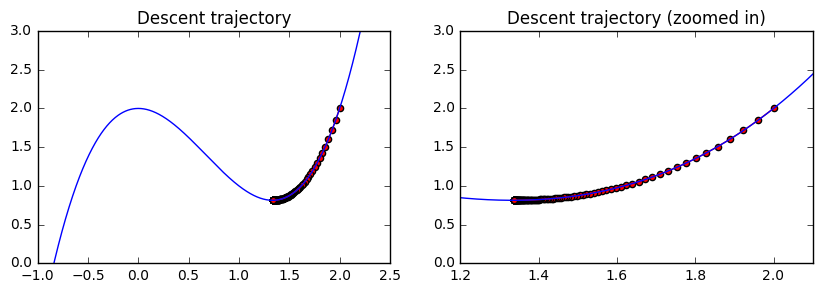

In [22]:
optimize_and_plot_steps(0.01)

Чем меньше шаг, тем медленнее мы идём к минимум (и можем вдобавок застрять по пути). Чем больше темп обучения, тем большие расстояния мы перепрыгиваем (и имеем гипотетическую возможность найти минимум получше). Хорошая стратегия — начинать с достаточно большого шага (чтобы хорошо попутешествовать по функции), а потом постепенно его уменьшать, чтобы стабилизировать процесс обучения в каком-то локальном минимуме.

Теперь будем изменять шаг динамически:
$lr(i + 1) = lr(i) * 0.9$.

In [24]:
def compute_learning_rate(i, prev_lr):
    return prev_lr * 0.9

Found local min: 1.333329734271068
Steps number: 8


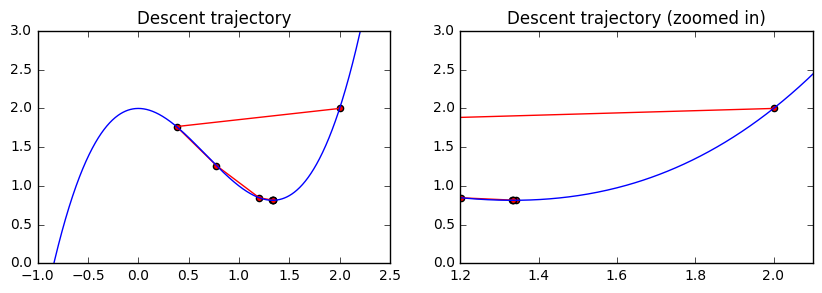

In [25]:
optimize_and_plot_steps(0.45, compute_learning_rate=compute_learning_rate)

Если сравнивать с постоянным темпом обучения, то мы нашли минимум в 2 раза быстрее.

Found local min: 1.3333020223878838
Steps number: 15


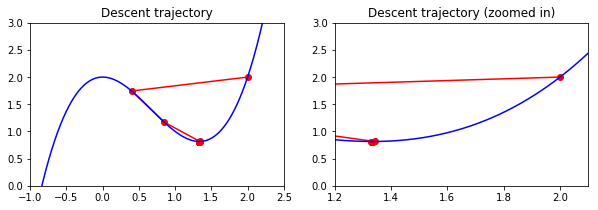

In [23]:
optimize_and_plot_steps(0.4)

Это, конечно, искуственный пример, но такая же идея используются для обучения алгоритмов машинного обучения с миллионами параметров, функции потерь которых имеют очень сложную структуру и не поддаются визуализации.

## Настройка линейной регрессии с помощью градиентного спуска

Рассмотрим теперь реальные данные и попробуем использовать градиентный спуск для решения задачи линейной регрессии.

In [26]:
df = pd.read_csv("food_trucks.txt", header=None)

In [27]:
df.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


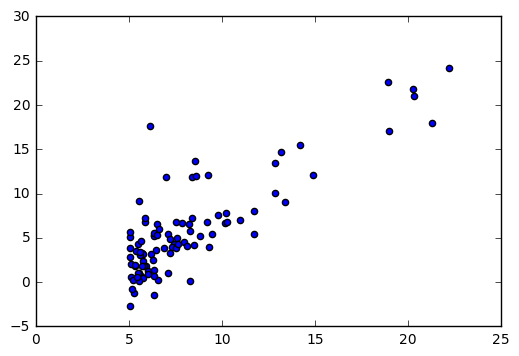

In [28]:
plt.scatter(df[0], df[1])

Визуализируйте данные. По оси X — население города, по оси Y — доход грузовика.

In [29]:
y = np.array(df[1])
x1 = np.array(df[0])
x0 = np.ones(x1.shape)

In [30]:
print(len(y))
print(len(x1))
print(len(x0))

97
97
97


Вспомним функцию потерь линейной регрессии:
$$
L(w) = \frac{1}{2m} \sum_{i=1}^m (h(x^i, w) - y^i)^2
$$
Здесь $h(x, w) = w^Tx = w_0 + w_1 x_1$ (предполагается, что $x_0=1$ — дополнительный признак для удобства).
$(x^i, y^i)$ — i-ый объект выборки.
Тогда правило обновления весов будет выглядеть следующим образом:
$$
w_j = w_j - lr \cdot \frac{1}{m}\sum_{i=1}^m(h(x^i, w) - y^i) x^i_j.
$$
Здесь $x^i_j$ — j-ая компонента i-ого объекта.

Определите функцию потерь и её производную. Эти функции имеют один аргумент — вектор весов $w$.

Напишите функцию минимизации $L(w)$ с помощью градиентного спуска, аналогичную optimize_and_plot_steps. На вход она принимает параметры обучения (темп обучения и начальное значение весов), оптимизирует итеративно функцию потерь, печатает итерации и визуализирует уменьшение функции потерь и найденное решение. Запустите функцию с постоянным темпом обучения и прокомментируйте результаты.

In [29]:
#w -- вектор параметров

In [129]:
def lossfunc(w):
    X = np.vstack([x0, x1]).T
    Y = y
    return ((1/(2*len(X))) * (X.dot(w) - Y)**2).sum()

In [130]:
w_init = np.array([1, 1])

In [131]:
def dlossfunc(w):
    X = np.vstack([x0, x1]).T
    Y = y
    return ((1/len(X)) * np.tile((X.dot(w) - Y), (2,1)).T * X).sum(axis=0)

In [132]:
def graddesc(w_init, lr, n): 
    #lr --- скорость обучения, шаг 
    #n --- количество итераций
    w = w_init
    l_list = []
    i_list = []
    
    for i in range (n):
        l = lossfunc(w)
        dl = dlossfunc(w)
        l_list.append(l)
        i_list.append(i)
        w = w - lr*dl
    plt.plot(i_list, l_list)
    
    return w

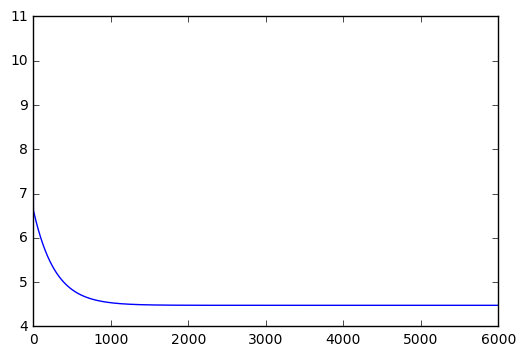

In [133]:
w = graddesc(w_init, 0.01, 6000)

In [134]:
print(w)

[-3.8956841   1.19302392]


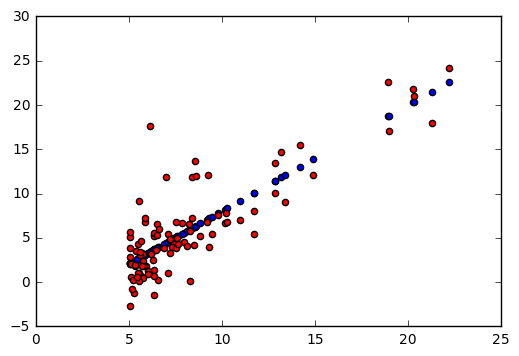

In [135]:
yhat = w[0]*x0 + w[1]*x1

plt.scatter(x1, np.array(yhat))
plt.scatter(x1, y, c='red')

Измените функцию минимизации так, чтобы темп обучения мог меняться динамически, аналогично примеру выше. Запустите функцию и прокомментируйте результаты.

In [249]:
def graddesc(w_init, lr, n): 
    #lr --- скорость обучения, шаг 
    #n --- количество итераций
    w = w_init
    l_list = []
    i_list = []
    
    for i in range (n):
        l = lossfunc(w)
        dl = dlossfunc(w)
        l_list.append(l)
        i_list.append(i)
        w = w - lr*dl
        lr = 1/np.sqrt(100000 + i)
        # lr = compute_learning_rate(i, lr)
    plt.plot(i_list, l_list)
    
    return w

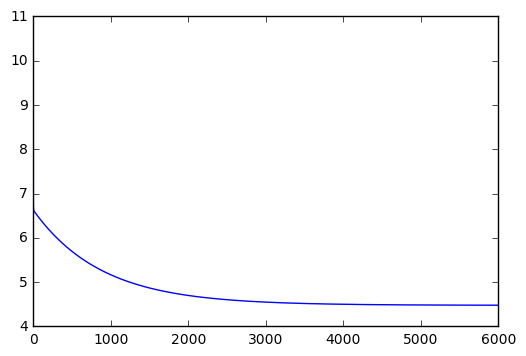

In [253]:
w = graddesc(w_init, 0.01, 6000)

In [254]:
w

array([-3.72886853,  1.17626549])

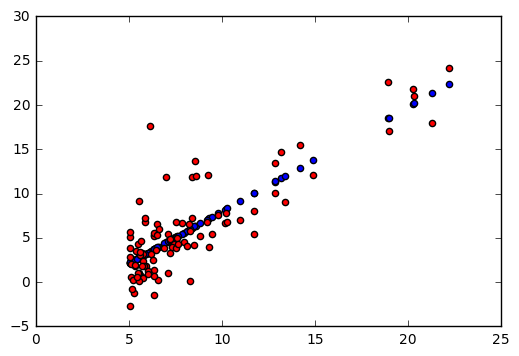

In [255]:
yhat = w[0]*x0 + w[1]*x1

plt.scatter(x1, np.array(yhat))
plt.scatter(x1, y, c='red')

---

## Softmax

Обобщение логистической функции для многомерного случая. Функция преобразует вектор $z$ размерности $K$ в вектор $\sigma$ той же размерности, где каждая координата $\sigma_i$ полученного вектора представлена вещественным числом в интервале $[0,1]$ и сумма координат равна 1.

Координаты $\sigma_i$ вычисляются следующим образом:


${\displaystyle \sigma (z)_{i}={\frac {e^{z_{i}}}{\displaystyle \sum _{k\mathop {=} 1}^{K}e^{z_{k}}}}}$


1. Реализуйте функцию softmax, которая на вход принимает вектор $z$, а на выходе считает от него софтмакс.
2. Добавьте возможность принимать на вход матрицу и считать softmax по столбцам (батч)

In [30]:
# correct solution:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [31]:
softmax(np.array([1, 2, 3]))

array([ 0.09003057,  0.24472847,  0.66524096])